In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -d -p biopython

Sebastian Raschka 11/20/2015 

CPython 3.5.0
IPython 4.0.0

biopython 1.66


# Fetch Iridium Dataset

In [7]:
iridium_ht_codes = """
1A28, 1AI5, 1AZM, 1B9V, 1BR6, 1C1B, 1CTR, 
1CVU, 1CX2, 1D3H, 1DD7, 1DDS, 1EOC, 1EXA, 
1EZQ, 1F0S, 1F0T, 1F0U, 1FCX, 1FCZ, 1FH8, 
1FH9, 1FHD, 1FJS, 1FL3, 1FM6, 1FM9, 1FQ5, 
1FRP, 1FVT, 1G9V, 1GM8, 1GWX, 1H1P, 1H1S, 
1HDY, 1HGG, 1HGH, 1HGI, 1HGJ, 1HNN, 1HP0, 
1HQ2, 1HVY, 1HWI, 1HWW, 1IVB, 1IVD, 1IVE, 
1IVF, 1IY7, 1JD0, 1JLA, 1K1J, 1K3U, 1KE5, 
1L2S, 1L7F, 1LPZ, 1LQD, 1LRH, 1M2Z, 1MBI, 
1ML1, 1MMV, 1MQ6, 1MTS, 1MZC, 1N1M, 1N2J, 
1N2V, 1NAV, 1OF1, 1OF6, 1OQ5, 1OWE, 1OYT, 
1P2Y, 1P62, 1PBD, 1PMN, 1PSO, 1Q1G, 1Q41, 
1QHI, 1R58, 1R9O, 1ROB, 1S19, 1SQ5, 1TOW, 
1TT1, 1U4D, 1UKZ, 1ULB, 1UML, 1UNL, 1UOU, 
1V0P, 1W1P, 1W2G, 1X8X, 1XM6, 1XOQ, 1YDR, 
1YDS, 1YDT, 1YQY, 1YV3, 1YVF, 1YWR, 2ACK, 
2BR1, 2CTC, 2MCP, 2PCP, 2TMN, 3PTB, 4AAH, 
4COX, 4TS1"""

iridium = [i.strip() for i in iridium_ht_codes.split(', ')]

In [10]:
import urllib.request
import os

def fetch_pdb(pdb_code):   
    txt = None
    try:
        response = urllib.request.urlopen('http://www.rcsb.org/pdb/files/%s.pdb' % pdb_code.lower())
        txt = response.read().decode('utf-8')
    except urllib.request.HTTPError as e:
        print('HTTP Error %s' %e.code)
    except urllib.request.URLError as e:
        print('URL Error %s' %e.args) 
    return txt

for i in iridium:
    i = i.lower()
    txt = fetch_pdb(i)
    with open('./iridium_ht/%s.pdb' % i, 'w') as f:
        f.write(txt)

# Benchmarking biopython

In [42]:
codes = [i for i in os.listdir('./iridium_ht/') if i.endswith('.pdb')]
paths = [os.path.join('./iridium_ht/', i) for i in codes]
codes = [i.strip('.pdb') for i in codes]

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
import os
import timeit
from Bio.PDB.PDBParser import PDBParser

def biopython_getresidues(pdbcode, path):
    parser = PDBParser()
    structure = parser.get_structure(pdbcode, path)
    res = []
    for residue in structure.get_residues():
        res.append(residue)
    
def f_test():
    biopython_getatoms(c, p)

bpython_times = []
for c, p in zip(codes, paths):
    t = timeit.timeit("f_test()", setup="from __main__ import f_test", number=10)
    bpython_times.append((t/10))

# Benchmarking biopandas

In [46]:
pdb_atomdict = [  {'id': 'record_name', 
                   'line': [0, 6], 
                   'type': str, 
                   'strf': lambda x: '%-6s' % x},
                  {'id': 'atom_number', 
                   'line': [6, 11], 
                   'type': int, 
                   'strf': lambda x: '%+5s' % str(x)},
                  {'id': 'blank_1', 
                   'line': [11, 12], 
                   'type': str, 
                   'strf': lambda x: '%-1s' % x},
                  {'id': 'atom_name', 
                   'line': [12, 16], 
                   'type': str, 
                   'strf': lambda x: ' %-3s' % x if len(x) < 4 else '%-4s' % x},
                  {'id': 'alt_loc', 
                   'line': [16, 17], 
                   'type': str, 
                   'strf': lambda x: '%-1s' % x},
                  {'id': 'resi_name', 
                   'line': [17, 20], 
                   'type': str, 
                   'strf': lambda x: '%-3s' % x},
                  {'id': 'blank_2', 
                   'line': [20, 21], 
                   'type': str, 
                   'strf': lambda x: '%-1s' % x},
                  {'id': 'chain_id', 
                   'line': [21, 22], 
                   'type': str, 
                   'strf': lambda x: '%-1s' % x},
                  {'id': 'resi_number', 
                   'line': [22, 26], 
                   'type': int, 
                   'strf': lambda x: '%+4s' % str(x)},
                  {'id': 'resi_insert_code', 
                   'line': [26, 27], 
                   'type': str, 
                   'strf': lambda x: '%-1s' % x},
                  {'id': 'blank_3', 
                   'line': [27, 30], 
                   'type': str, 
                   'strf': lambda x: '%-3s' % x},
                  {'id': 'x_coord', 
                   'line': [30, 38], 
                   'type': float, 
                   'strf': lambda x: ('%+8.3f' % x).replace('+', ' ')},
                  {'id': 'y_coord', 
                   'line': [38, 46], 
                   'type': float, 
                   'strf': lambda x: ('%+8.3f' % x).replace('+', ' ')},
                  {'id': 'z_coord', 
                   'line': [46, 54], 
                   'type': float, 
                   'strf': lambda x: ('%+8.3f' % x).replace('+', ' ')},
                  {'id': 'occupancy', 
                   'line': [54, 60], 
                   'type': float, 
                   'strf': lambda x: ('%+6.2f' % x).replace('+', ' ')},
                  {'id': 'b_factor', 
                   'line': [60, 66], 
                   'type': float, 
                   'strf': lambda x: ('%+6.2f' % x).replace('+', ' ')},
                  {'id': 'blank_4', 
                   'line': [66, 72], 
                   'type': str, 
                   'strf': lambda x: '%-7s' % x},
                  {'id': 'segment_id', 
                   'line': [72, 76], 
                   'type': str, 
                   'strf': lambda x: '%-3s' % x},
                  {'id': 'element_symbol', 
                   'line': [76, 78], 
                   'type': str, 
                   'strf': lambda x: '%+2s' % x},
                  {'id': 'charge', 
                   'line': [78, 80], 
                   'type': float, 
                   'strf': lambda x: ('%+2.1f' % x).replace('+', ' ') if pd.notnull(x) else ' '}
               ] 

pdb_otherdict = [  {'id': 'record_name', 
                    'line': [0, 6], 
                    'type': str, 
                    'strf': lambda x: x},
                   {'id': 'entry', 
                    'line': [6, -2], 
                    'type': str, 
                    'strf': lambda x: x},
               ]
pdb_records = {'ATOM': pdb_atomdict,
               'HETATM': pdb_atomdict,
               'ANISOU': pdb_atomdict,
               'OTHERS': pdb_otherdict}

In [47]:
import pandas as pd
import numpy as np
import gzip
import urllib

class PandasPDB(object):
    def __init__(self):
        self._df = {}
        self.pdb_text = ''
        self._get_dict = {}
        
    @property
    def df(self):
        return self._df
    
    @property
    def df_lean(self):
        
        self._df[np.isfinite(self._df)]
        return self._df
        
    def read_pdb(self, path):
        self.pdb_text = self._read_pdb(path=path)
        self._df = self._construct_df(pdb_lines=self.pdb_text.split('\n'))
        
    def fetch_pdb(self, pdb_code):
        """Fetches PDB file contents from rcsb.org.

        Parameters
        ----------
        pdb_code : str
            A 4-letter PDB code, e.g., "3eiy"

        """   
        self.pdb_text = self._fetch_pdb(pdb_code)
        self._df = self._construct_df(pdb_lines=self.pdb_text.split('\n'))
    
    def get(s, df=None):
        if not self._getdict:
            self._init_get_dict()
        if s not in self._getdict.keys():
            raise ValueError('s must be in %s' % self._getdict.keys())
        if not df:
            df = self._df['ATOM']
        
    def _init_get_dict(self):
        get_dict = {'main-chain': self._get_mainchain,
                    'hydrogens': self._get_hydrogens,
                    'waters': self._get_waters,
                    'c-alpha': self._get_calpha}
        self._getdict = get_dict
    
    @staticmethod
    def rmsd(df1, df2):
        pass

    @staticmethod
    def _read_pdb(path):
        r_mode = 'r'
        openf = open
        if path.endswith('.gz'):
            r_mode = 'rb'
            openf = ''
        with openf(path, r_mode) as f:
            txt = f.read()
        if path.endswith('.gz'):
            txt = txt.decode('utf-8')
        return txt
    
    @staticmethod
    def _fetch_pdb(pdb_code):   
        txt = None
        try:
            response = urllib.request.urlopen('http://www.rcsb.org/pdb/files/%s.pdb' % pdb_code.lower())
            txt = response.read().decode('utf-8')
        except urllib.request.HTTPError as e:
            print('HTTP Error %s' %e.code)
        except urllib.request.URLError as e:
            print('URL Error %s' %e.args) 
        return txt
        
    @staticmethod
    def _get_mainchain(df):
        mc =  df[(ppdb.df['ATOM']['atom_name'] == 'C') | 
                 (ppdb.df['ATOM']['atom_name'] == 'O') | 
                 (ppdb.df['ATOM']['atom_name'] == 'N') | 
                 (ppdb.df['ATOM']['atom_name'] == 'CA')]
        return mc

    @staticmethod
    def _get_pdbcode(df):
        pass

    @staticmethod
    def _get_header(df):
        pass
    
    @staticmethod
    def _get_title(df):
        pass
    
    @staticmethod
    def _get_moleculename(df):
        pass
    
    @staticmethod
    def _get_waters(df):
        pass
        
    @staticmethod
    def _get_hydrogens(df):
        pass
    
    @staticmethod
    def _get_calpha(df):
        return df[df['atom_name'] == 'CA']

    @staticmethod
    def _construct_df(pdb_lines):  
        valids = tuple(pdb_records.keys())
        line_lists = {r:[] for r in valids}
        line_lists['OTHERS'] = []
        for line_num, line in enumerate(pdb_lines):
            if line.strip() and line.startswith(valids):
                record = line[:6].rstrip()
                line_ele = ['' for _ in range(len(pdb_records[record])+1)]
                for idx, ele in enumerate(pdb_records[record]):
                    line_ele[idx] = line[ele['line'][0]:ele['line'][1]].strip()
                line_ele[-1] = line_num
                line_lists[record].append(line_ele)
            else:
                line_lists['OTHERS'].append([line[:6], line[6:-2].strip(), line_num])
                
        dfs = {}
        for r in line_lists.items():
            df = pd.DataFrame(r[1])
            if not df.empty:
                df.columns = [c['id'] for c in pdb_records[r[0]]] + ['line_idx']
                for c in pdb_records[r[0]]:
                    try:
                        df[c['id']] = df[c['id']].astype(c['type'])
                    except ValueError:
                        # Value Error expected if float/int columns are empty strings
                        df[c['id']] = pd.Series(np.nan, index=df.index)
                        pass
            dfs[r[0]] = df
        return dfs  
                      
    def to_pdb(self, path, to_write=None, gz=False):
        if gz:
            openf = gzip.open
            w_mode = 'wb'
        else:
            openf=open
            w_mode = 'w'
        if not to_write:
            to_write = self._df
            records = self._df.keys()
            dfs = {r:to_write[r].copy() for r in records if not to_write[r].empty}
            for r in dfs.keys():
                for col in pdb_records[r]:
                    dfs[r][col['id']] = dfs[r][col['id']].apply(col['strf'])
                    dfs[r]['OUT'] = pd.Series('', index=dfs[r].index)
                
                for c in (c for c in dfs[r].columns if c not in {'line_idx', 'OUT'}):
                    dfs[r]['OUT'] = dfs[r]['OUT'] + dfs[r][c]
            df = pd.concat(dfs)
            df.sort(columns='line_idx', inplace=True)
            with openf(path, w_mode) as f:
                f.write('\n'.join(df['OUT'].tolist()))
        """    
        if isinstance(to_write, pd.core.frame.DataFrame):
            records = np.unique(to_write['record_name'])
            dfs = [to_write[to_write['record_name'] == r ].copy() for r in records]
        else:
            records = to_write
            dfs = [self._df[r].copy() for r in records]
        with open(path, 'w') as f:
            for df, r in zip(dfs, records):
                col_to_write = []
                for col in pdb_records[r]:
                    df[col['id']] = df[col['id']].apply(col['strf'])
                    col_to_write.append(col['id'])
                for ele in df[col_to_write].values:
                    f.write(''.join(ele) + '\n')
        """

In [119]:
import os
import timeit
#from Bio.PDB.PDBParser import PDBParser

def biopandas_getatoms(path):
    ppdb = PandasPDB()
    ppdb.read_pdb(path)
    residues = ppdb.df['ATOM']['resi_name']
    
def f_test():
    biopandas_getatoms(p)

bpandas_times = []
for p in paths:
    t = timeit.timeit("f_test()", setup="from __main__ import f_test", number=10)
    bpandas_times.append((t/10))

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

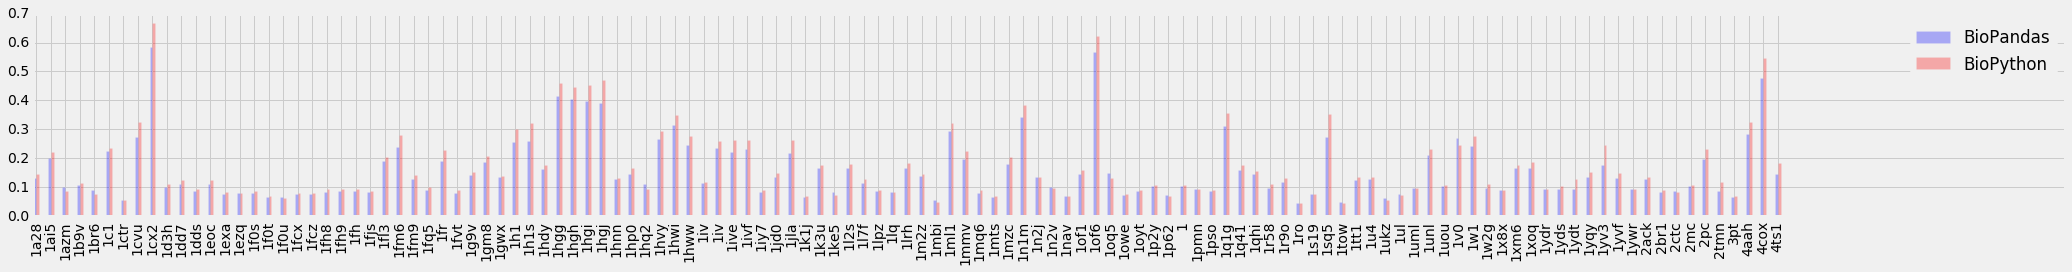

In [121]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(29,4))

    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.3

    x = np.array(range(len(codes)))
    rects1 = plt.bar(x, bpandas_times, bar_width,
                     alpha=opacity,
                     color='b',
                     label='BioPandas')


    rects2 = plt.bar(x + bar_width, bpython_times, bar_width,
                     alpha=opacity,
                     color='r',
                     label='BioPython')


    plt.xticks(x + bar_width, codes, rotation=90)
    plt.legend()

    plt.tight_layout()
    plt.show()

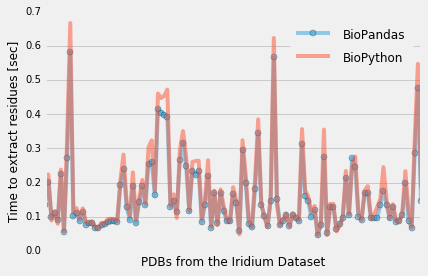

In [128]:
with plt.style.context('fivethirtyeight'):
    plt.plot(x, bpandas_times, alpha=0.5, marker='o', label='BioPandas')
    plt.plot(x, bpython_times, alpha=0.5, label='BioPython')
    plt.ylabel('Time to extract residues [sec]')
    plt.xlabel('PDBs from the Iridium Dataset')
    plt.legend(numpoints=1)
    plt.xticks([])
plt.show()

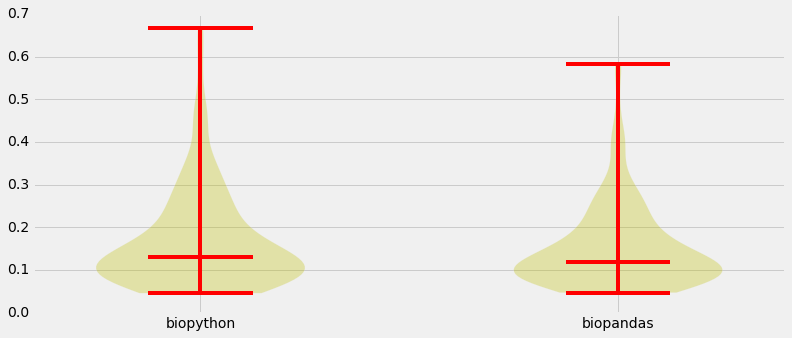

In [129]:
with plt.style.context('fivethirtyeight'):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

    # generate some random test data
    all_data = [bpython_times, bpandas_times]

    # plot violin plot
    axes.violinplot(all_data,
                       showmeans=False,
                       showmedians=True)
    #axes.set_title('Extracing Atom Names')


    # add x-tick labels
    plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
             xticklabels=['biopython', 'biopandas'])
    plt.show()